## Stage 1 EDA Klasifikasi Profit Menu

#### Langkah 1.1 – Load Dataset

In [3]:
import pandas as pd

# Load data dari file CSV
df = pd.read_csv('../data/restaurant_profitability.csv', sep=';')

In [4]:
# Tampilkan 5 baris awal
df.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


#### Langkah 1.2 – Pemeriksaan Struktur dan Informasi Dasar


In [5]:
# Cek tipe data dan non-null values
df.info()

# Cek jumlah missing values
print(df.isnull().sum())

# Cek deskripsi statistik untuk fitur numerik
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB
RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64


,Price
count,1000.00000
mean,12.81801
std,7.41713
min,2.01000
25%,4.86750
50%,12.53500
75%,17.69000
max,29.84000


#### Langkah 1.3 – Pemeriksaan Distribusi Target (Profitability)

Profitability
Medium    0.495
High      0.386
Low       0.119
Name: proportion, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16248\3973793996.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Profitability', data=df, order=['Low', 'Medium', 'High'], palette='Set2')


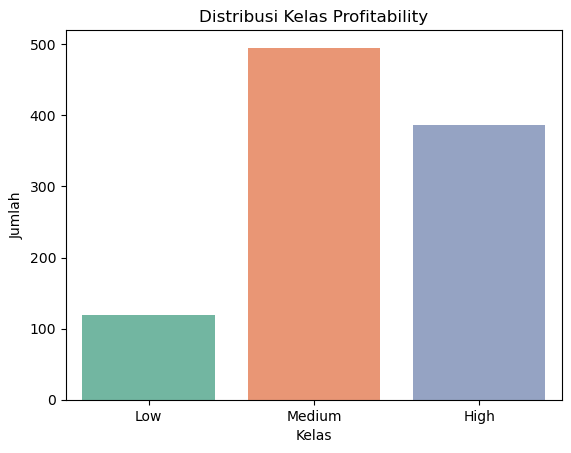

In [6]:
# Cek distribusi kelas
print(df['Profitability'].value_counts(normalize=True))

# Visualisasikan distribusinya
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Profitability', data=df, order=['Low', 'Medium', 'High'], palette='Set2')
plt.title('Distribusi Kelas Profitability')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

### Langkah 1.4 – Eksplorasi Fitur Numerik (Price)

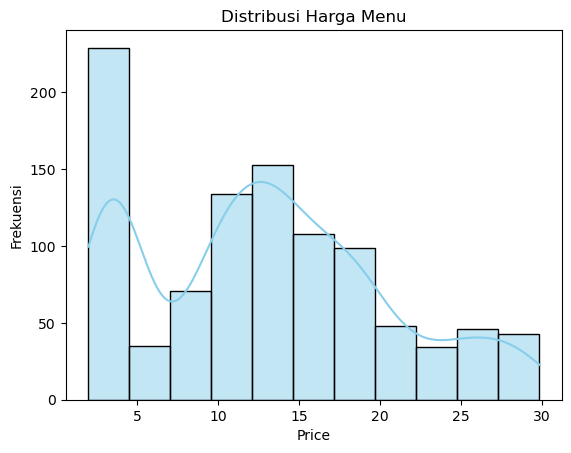

In [8]:
# Distribusi harga
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title('Distribusi Harga Menu')
plt.xlabel('Price')
plt.ylabel('Frekuensi')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16248\1145997771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Profitability', y='Price', data=df, palette='pastel')


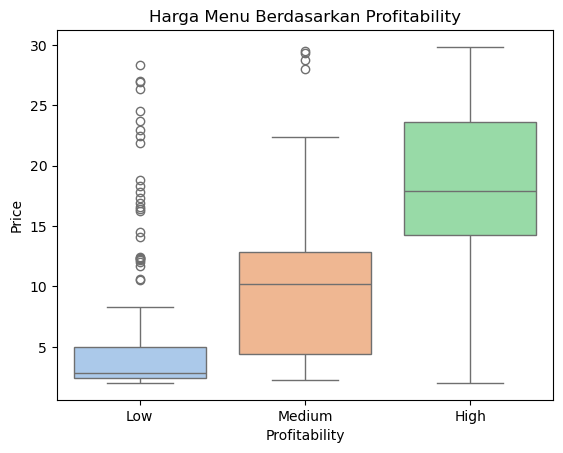

In [9]:
# Boxplot harga vs target
sns.boxplot(x='Profitability', y='Price', data=df, palette='pastel')
plt.title('Harga Menu Berdasarkan Profitability')
plt.show()

#### Langkah 1.5 – Heatmap Korelasi Numerik (opsional)


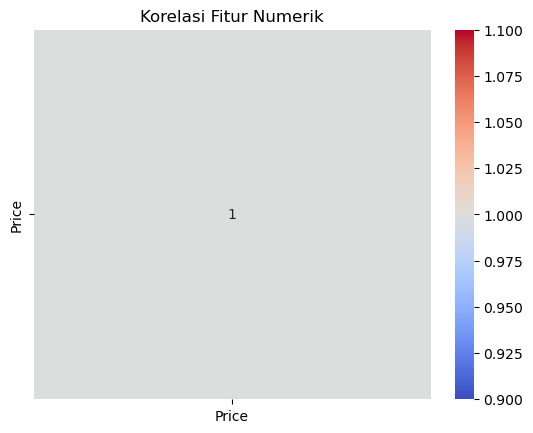

In [10]:
sns.heatmap(df[['Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

#### Langkah 1.6 – Encode Target Menjadi Numerik

In [14]:
from sklearn.preprocessing import LabelEncoder
import joblib

le_target = LabelEncoder()
df['Profitability'] = le_target.fit_transform(df['Profitability'])

# Simpan encoder untuk deployment nanti
joblib.dump(le_target, '../model/le_target.pkl')

['../model/le_target.pkl']